#               HOW TO CREATE A POPULAR TED TALK?

#                          -- Data Analysis and Visualizations on TED Talk Dataset

## Team: Li Ling; Ying Yang; Yitong Sun


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ast
from wordcloud import WordCloud, STOPWORDS


TED = pd.read_csv("ted_main.csv")
TED.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [69]:
#To start with, we generate the neater header with the first row as an example:

TED.iloc[0]

comments                                                           4553
description           Sir Ken Robinson makes an entertaining and pro...
duration                                                           1164
event                                                           TED2006
film_date                                                    1140825600
languages                                                            60
main_speaker                                               Ken Robinson
name                          Ken Robinson: Do schools kill creativity?
num_speaker                                                           1
published_date                                               1151367060
ratings               [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
related_talks         [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...
speaker_occupation                                      Author/educator
tags                  ['children', 'creativity', 'culture', 'dan

In [70]:
#First, we want to see if there are NAs in dataset.
TED.isna().sum()
#We can see that the spearker_occupation has some NA values, so we need to deal with these NAs.

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [71]:
#We looked up online, the way to deal with NA value depends on the datatype of this variable. 
print(TED['speaker_occupation'].dtypes)
#Here we get the object, so we should replace NA with the mode.
speaker_occupation_mode = TED['speaker_occupation'].mode()[0]
print(speaker_occupation_mode)

object
Writer


In [72]:
# We find that the date variables look confusing in this dataset,as they showed by seconds.
#So we change them into better understood format.
TED['film_date'] = pd.to_datetime(TED.film_date,unit='s')
TED['published_date'] = pd.to_datetime(TED.published_date,unit='s')
TED.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


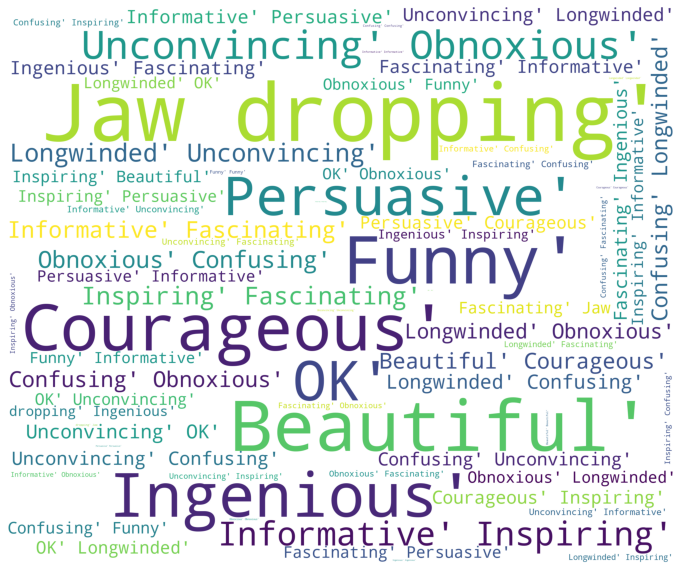

In [73]:
#Let's find the most common tag for the Teds!
corpus = ' '.join(TED["ratings"])
corpus = corpus.replace('.', '. ')
querywords = corpus.split()
ls = list()

for i in range(35699):
    ls.append(querywords[(6*i+3)])
    
str1 = ', '.join(ls)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(str1)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [10]:
#Top 10 funniest TED talks & top 10 most confusing TED talks

#TED.iloc[1]['ratings']
#TED['ratings'] = TED['ratings'].apply(lambda x: ast.literal_eval(x))
#TED['funny'] = TED['ratings'].apply(lambda x: x[0]['count'])
#TED['jawdrop'] = TED['ratings'].apply(lambda x: x[-3]['count'])
#TED['beautiful'] = TED['ratings'].apply(lambda x: x[3]['count'])
#TED['confusing'] = TED['ratings'].apply(lambda x: x[2]['count'])
#TED[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False)[:10]
#TED[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending=False)[:10]


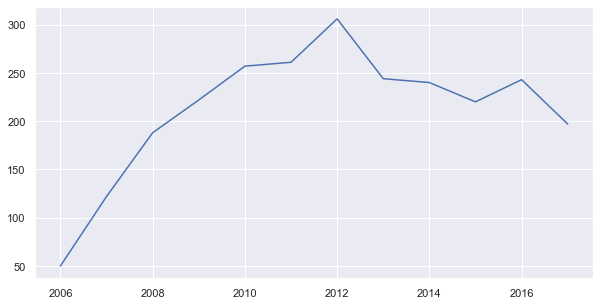

In [74]:
#take a quick look at each year's number.
plt.figure(figsize=(10, 5))
TED.published_date.dt.year.value_counts().sort_index().plot()

In [75]:
#Describing the numerical attributes of the data set
TED.describe().T

,count,mean,std,min,25%,50%,75%,max
comments,2550.0,1.915624e+02,2.823152e+02,2.0,63.00,118.0,221.75,6404.0
duration,2550.0,8.265102e+02,3.740091e+02,135.0,577.00,848.0,1046.75,5256.0
languages,2550.0,2.732627e+01,9.563452e+00,0.0,23.00,28.0,33.00,72.0
num_speaker,2550.0,1.028235e+00,2.077047e-01,1.0,1.00,1.0,1.00,5.0
views,2550.0,1.698297e+06,2.498479e+06,50443.0,755792.75,1124523.5,1700759.50,47227110.0


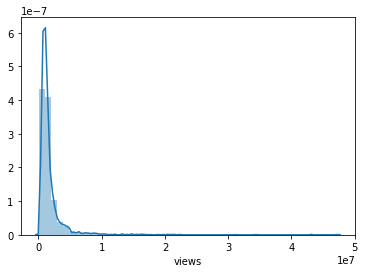

In [13]:
#First, we care about the views, as it is one of the most important indicator to measure.
sns.distplot(TED["views"])

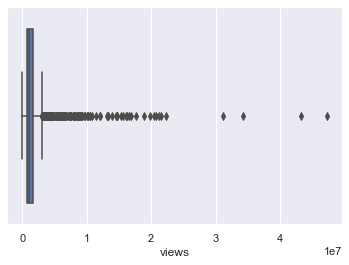

In [76]:
#another way to see the distribution of views
sns.boxplot(TED["views"])

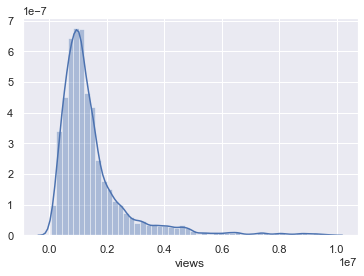

In [77]:
#we can see that most of the views are less than 1*1e7, so we changed our code to make our plot better.
sns.distplot(TED[TED['views'] < 1e7]['views'])

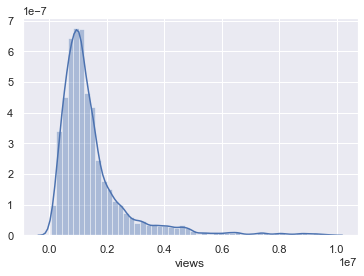

In [78]:
#we can see that most of the views are less than 1*1e7, so we changed our code to make our plot better.
sns.distplot(TED[TED['views'] < 1e7]['views'])

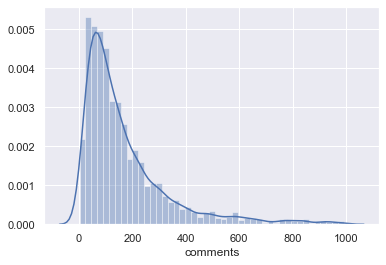

In [79]:
# pretty same case for comments, as comment is another important indicator for popularity.
sns.distplot(TED[TED['comments'] < 1000]['comments'])

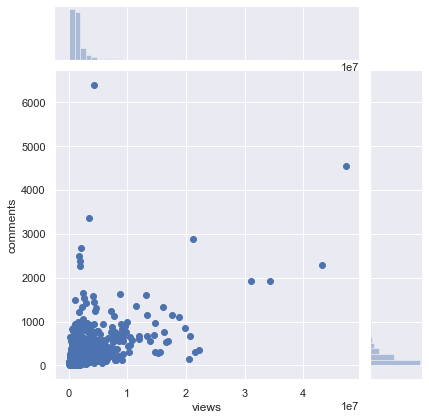

In [80]:
#The shapes of comments and views are pretty similar, so we begin to think what is their correlation.
sns.jointplot(x='views', y='comments', data = TED)

In [81]:
TED[['comments','views']].corr()

,comments,views
comments,1.000000,0.530939
views,0.530939,1.000000


In [82]:
TED['comm_view_ratio'] = TED['comments'] / TED['views']

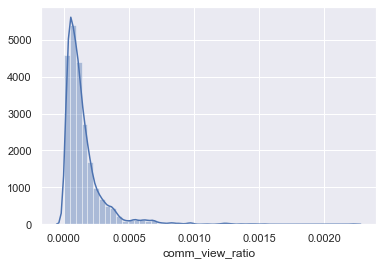

In [83]:
sns.distplot(TED["comm_view_ratio"])

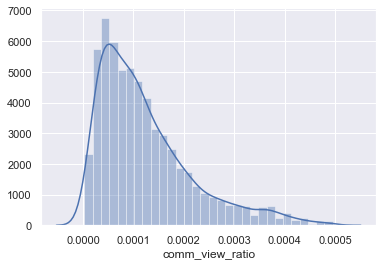

In [84]:
sns.distplot(TED[TED['comm_view_ratio'] < 0.0005]['comm_view_ratio'])

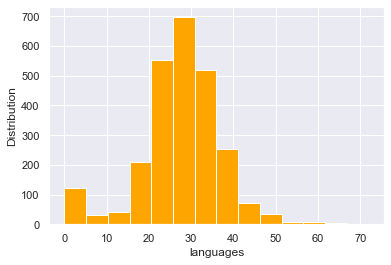

In [85]:
# The number of languages is also a factor we concerned.
plt.hist(TED.languages, 14, color = 'orange')                                                           
plt.xlabel('languages')                             
plt.ylabel('Distribution')                                        
plt.show()

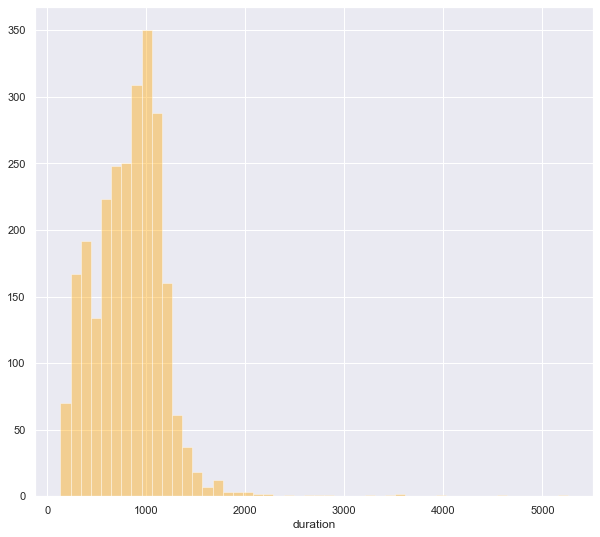

In [86]:
# We also want to see the distribution of durations
sns.set(font_scale=1) 
fig, ax = plt.subplots(figsize = (10, 9))
sns.distplot(a = TED.duration, kde = False,color='orange')

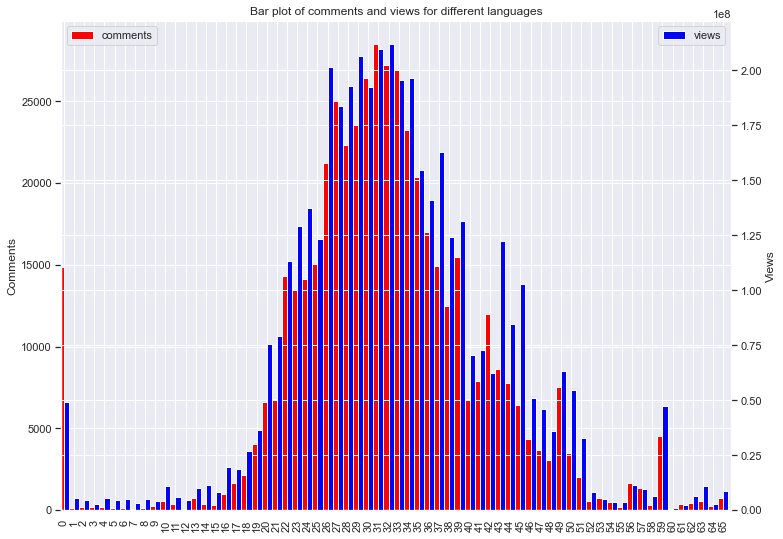

The number of language in which the talk is available with most comments is: 31
The number of language in which the talk is available language with most views is: 32


In [87]:
# How many commments and views by numbers of languages in which the talk is available
langComm = TED.groupby('languages').sum()['comments'].reset_index()
langView = TED.groupby('languages').sum()['views'].reset_index()

# plot 
fig = plt.figure(figsize = (12, 9))
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

langComm.comments.plot(kind='bar', color='red', ax=ax, position=1)
langView.views.plot(kind='bar', color='blue', ax=ax2, position=0)
ax.set_ylabel('Comments')
ax2.set_ylabel('Views')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title('Bar plot of comments and views for different languages')

plt.show()

maxCommLang = np.argmax(langComm.comments)
maxViewLang = np.argmax(langView.views)
print("The number of language in which the talk is available with most comments is:", maxCommLang)
print("The number of language in which the talk is available language with most views is:", maxViewLang)

In general views will be more than comments, but for some languages, we can see the ratio of comments and views will be higher than other languages. This means viewers tend to comment more under those languages. In this sense, we decided to create comments/views variable as "comm_view_ratio" in the dataframe.

In [88]:
# Monthly analysis
# Add month column
TED['comm_view_ratio'] = TED['comments'] / TED['views']
TED['month'] = TED['published_date'].dt.month

# generate group by month function with string of variable as input
# return grouped dataframe

def dfGroupByMonth(v):
    df = TED.groupby('month').median()[v].reset_index().sort_values(by = 'month')
    df['month'] = df['month'].apply(lambda x: datetime.date(1900, x, 1).strftime('%B'))
    return df

monthViewMedian = dfGroupByMonth('views')
monthCommMedian = dfGroupByMonth('comments')
monthCVRatioMedian = dfGroupByMonth('comm_view_ratio')

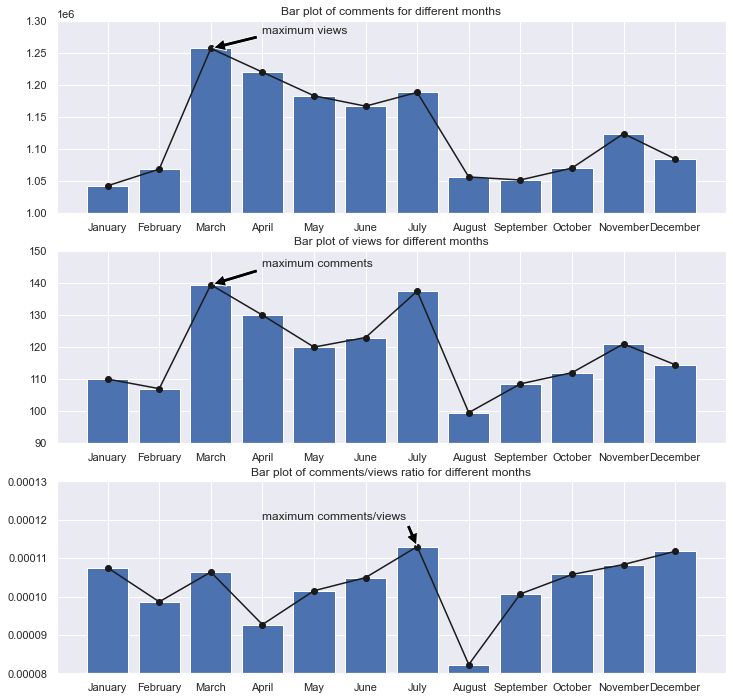

In [89]:
# plot
    
plt.figure(figsize=(12, 12))

plt.subplot(311)
plt.plot(monthViewMedian.month, monthViewMedian.views, 'ko',monthViewMedian.month, monthViewMedian.views,'k')
plt.bar(monthViewMedian.month, monthViewMedian.views)
plt.ylim(1000000,1300000)
plt.annotate('maximum views', xy=(2, 1257011.5), xytext=(3, 1280000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Bar plot of comments for different months')

plt.subplot(312)
plt.plot(monthCommMedian.month, monthCommMedian.comments, 'ko',monthCommMedian.month, monthCommMedian.comments,'k')
plt.bar(monthCommMedian.month, monthCommMedian.comments)
plt.ylim(90,150)
plt.annotate('maximum comments', xy=(2, 139.5), xytext=(3, 145), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Bar plot of views for different months')

plt.subplot(313)
plt.plot(monthCVRatioMedian.month, monthCVRatioMedian.comm_view_ratio, 'ko',monthCVRatioMedian.month, monthCVRatioMedian.comm_view_ratio,'k')
plt.bar(monthCVRatioMedian.month, monthCVRatioMedian.comm_view_ratio)
plt.ylim(0.00008,0.00013)
plt.annotate('maximum comments/views', xy=(6, 0.000113), xytext=(3, 0.00012), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Bar plot of comments/views ratio for different months')

plt.show()

Three histograms above show us the median of views, comments and comments/views ratio for each month. March is the month which has the highest median value in comments and view. In aspect of comments/view ratio, July become the largest. 

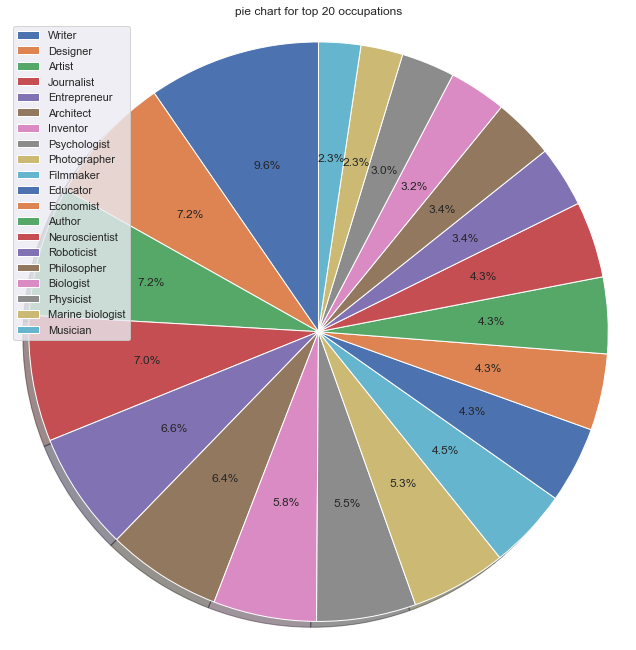

In [90]:
top20Count = TED.speaker_occupation.value_counts()[:20]

plt.figure(figsize=(9,9))
plt.pie(top20Count, autopct = '%1.1f%%', shadow = True, startangle=90)
plt.legend(labels = top20Count.index, loc = "best")
plt.axis('equal')
plt.tight_layout()
plt.title('pie chart for top 20 occupations')
plt.show()

As shown above, the most popular top 20 occupations in TED contains writers, designers, artist, journalists. Then we can say most of the popular topics are among art domain, not science. We can still see economist, biologist and physicist, but compared to art experts, they have relativly low quantity.

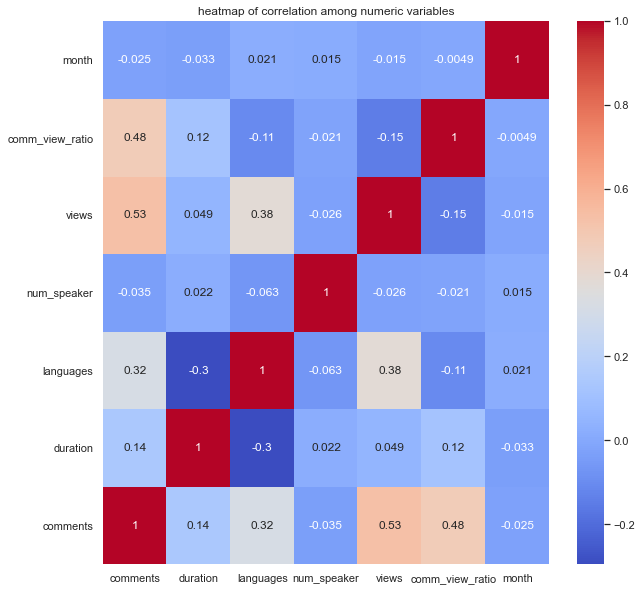

In [91]:
# Pick out all numeric columns and make a heatmap
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericTED = TED.select_dtypes(include = numerics)
plt.figure(figsize = [10,10])
ax = sns.heatmap(numericTED.corr(), annot=True, cmap='coolwarm')
ax.set_ylim(0, 7)
plt.title('heatmap of correlation among numeric variables')
plt.show()

Obviously, comments, views and comments/views ratio will be highly correlated with each other, which is consistent with common sense.Other potential factors may be languages has a 0.38 correlation with views. The correlations among variables in general are low in this dataset. One point worthing talking about is duration doesn't relate too much with comments and views, which means viewer usually don't care how long the speech is. To have a better visualization of the relationships between those numeric variables, we did a pairplot below.

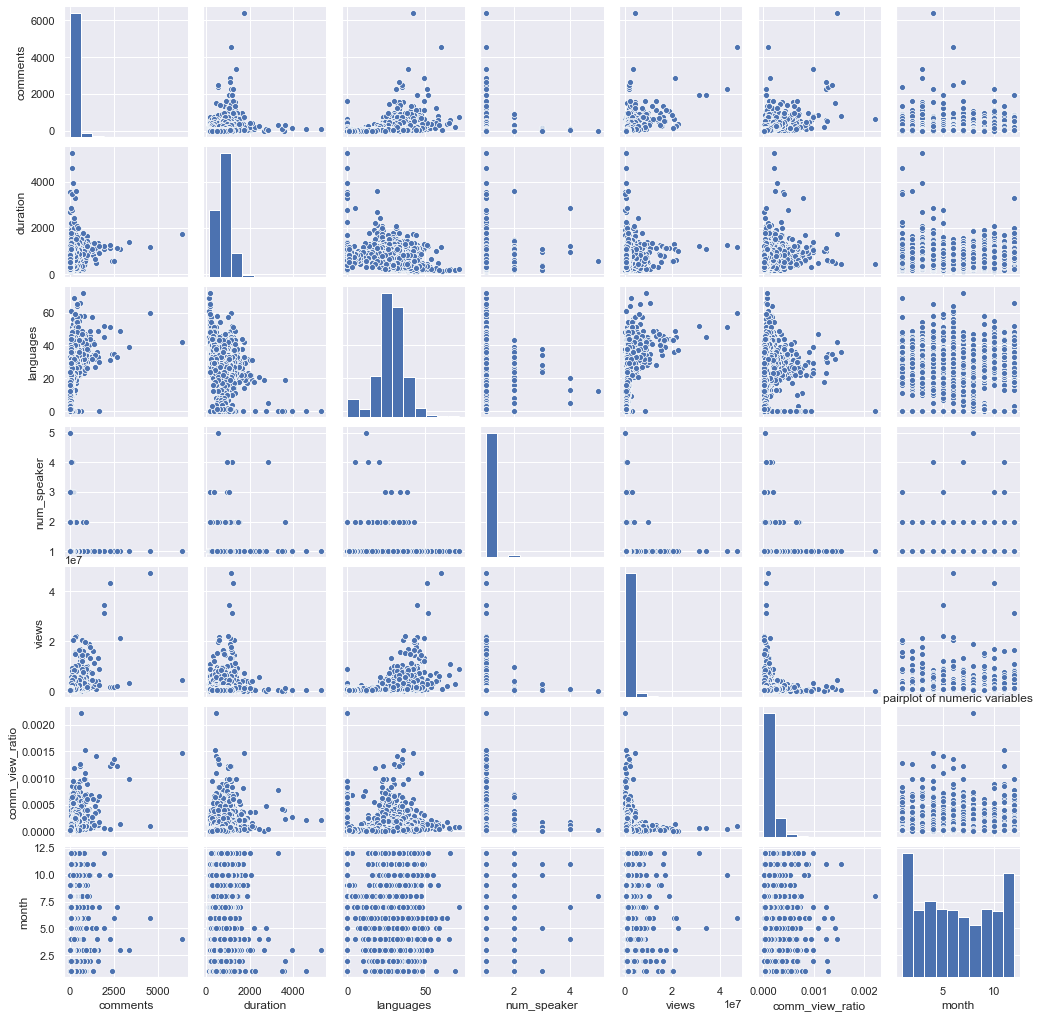

In [92]:
sns.pairplot(numericTED, height = 2)
plt.title('pairplot of numeric variables')
plt.show()

In [31]:
TED.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comm_view_ratio,month
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,6
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,6
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,6
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,6
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,6


In [98]:
#top 10 most comments TED

comments = np.argsort(-TED['comments'],axis= 0)
comments = TED.iloc[comments[0:5]]
comments = comments.drop(['duration','event','film_date', 'languages', 'num_speaker', 'published_date','ratings','related_talks','speaker_occupation','tags','views'],axis=1)

comments.head(5)


,comments,description,main_speaker,name,title,url,comm_view_ratio,month
96,6404,Richard Dawkins urges all atheists to openly s...,Richard Dawkins,Richard Dawkins: Militant atheism,Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,0.001464,4
0,4553,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,0.000096,6
644,3356,"Questions of good and evil, right and wrong ar...",Sam Harris,Sam Harris: Science can answer moral questions,Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,0.000977,3
201,2877,Jill Bolte Taylor got a research opportunity f...,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,0.000136,3
1787,2673,Our consciousness is a fundamental aspect of o...,David Chalmers,David Chalmers: How do you explain consciousness?,How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,0.001236,7


In [100]:
#top 10 most views TED

views = np.argsort(-TED['views'],axis= 0)
views = TED.iloc[views[0:5]]
views = views.drop(['duration','event','film_date', 'languages', 'num_speaker', 'published_date','ratings','related_talks','speaker_occupation','tags','comments'],axis=1)
views


,description,main_speaker,name,title,url,views,comm_view_ratio,month
0,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,6
1346,"Body language affects how others see us, but i...",Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405,0.000053,10
677,Simon Sinek has a simple but powerful model fo...,Simon Sinek,Simon Sinek: How great leaders inspire action,How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432,0.000056,5
837,Brené Brown studies human connection -- our ab...,Brené Brown,Brené Brown: The power of vulnerability,The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150,0.000062,12
452,"""Bonk"" author Mary Roach delves into obscure s...",Mary Roach,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883,0.000016,5


In [109]:
#top 10 most comments/views ratio TED
TED.head(5)

ratio = np.argsort(-TED['comm_view_ratio'],axis= 0)
ratio = TED.iloc[ratio[0:5]]
ratio = ratio.drop(['duration','event','film_date', 'languages', 'num_speaker', 'published_date','ratings','related_talks','speaker_occupation','tags','comments','views'],axis=1)
ratio

,description,main_speaker,name,title,url,comm_view_ratio,month
744,Hours before New York lawmakers rejected a key...,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,0.002220,8
803,David Bismark demos a new system for voting th...,David Bismark,David Bismark: E-voting without fraud,E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,0.001534,11
96,Richard Dawkins urges all atheists to openly s...,Richard Dawkins,Richard Dawkins: Militant atheism,Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,0.001464,4
694,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,0.001421,5
954,Janet Echelman found her true voice as an arti...,Janet Echelman,Janet Echelman: Taking imagination seriously,Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,0.001360,6
